# Tasks

#### 3: Import the libraries you need for your analysis (e.g., folium).

#### 4: Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data (or use this one if your analysis is about the US).

#### 5: Wrangle your project data to meet the needs of your analysis.

#### 6: Clean your data set—watch for missing and extreme values.

#### 7: Create a choropleth map using a variable of your choice.

#### 8: Discuss the results and what they mean in a markdown section.

- Does the analysis answer any of your existing research questions?
- Does the analysis lead you to any new research questions?


# Importing Libraries

#### 3: Import the libraries you need for your analysis (e.g., folium).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

# Importing Data

In [6]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [5]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_gunviolence_cleand_2.csv'))

#### 4: Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data (or use this one if your analysis is about the US).

In [8]:
country_geo = r'C:\Users\maxca\Part 6 Gun Violence\02 Data\Prepared Data\us-states_task_6.3.json'

In [9]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\maxca\Part 6 Gun Violence\02 Data\Prepared Data\us-states_task_6.3.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

#### 5: Wrangle your project data to meet the needs of your analysis.

In [10]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014-01-01,Michigan2014,20,9747730
1,1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014-01-01,Michigan2014,20,9747730
2,2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014-01-01,Michigan2014,20,9747730
3,3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014-01-01,Michigan2014,20,9747730
4,4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014-01-01,Michigan2014,20,9747730


# Dropping Unnamed: 0

In [11]:
df = df.drop(columns =['Unnamed: 0'])

In [12]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014-01-01,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014-01-01,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014-01-01,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014-01-01,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014-01-01,Michigan2014,20,9747730


# Isolating the year

In [14]:
# convert the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

# extract the day, month, and year components
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# show the modified data frame
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population,day,month
0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014,Michigan2014,20,9747730,1,1
1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014,Michigan2014,20,9747730,1,1
2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014,Michigan2014,20,9747730,1,1
3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014,Michigan2014,20,9747730,1,1
4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014,Michigan2014,20,9747730,1,1


# Dropping day and month

In [15]:
df = df.drop(columns =['day', 'month'])

In [16]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014,Michigan2014,20,9747730


#### Aggregating the date for every year and incident_id to count

In [17]:
df_agg = df.groupby('state_year').aggregate({'incident_id' : 'count', 'n_killed': 'sum',
                             'n_injured': 'sum', 'n_guns_involved' : 'sum', 'lawtotal': 'first', 'Total population' : 'first'})

In [18]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population
state_year,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293
Alabama2015,1034,385,562,1484.432117,10,4387292
Alabama2016,1309,488,761,1839.658694,10,4540957
Alabama2017,1461,544,856,1882.117325,10,4592069
Alabama2018,347,135,219,393.000000,10,4533634


#### Calculation incident_id(count), n_killed, n_injured, n_guns_involved to per 100000

In [20]:
# Calculate incidents per 100000 population
df_agg['incidents_per_100000'] = (df_agg['incident_id'] / df_agg['Total population']) * 100000

In [21]:
# Calculate n_killed per 100000 population
df_agg['n_killed_per_100000'] = (df_agg['n_killed'] / df_agg['Total population']) * 100000

In [22]:
# Calculate injured per 100000 population
df_agg['n_injured_per_100000'] = (df_agg['n_injured'] / df_agg['Total population']) * 100000

In [23]:
# Calculate n_guns_involved per 100000 population
df_agg['n_guns_involved_per_100000'] = (df_agg['n_guns_involved'] / df_agg['Total population']) * 100000

In [24]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
state_year,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260
Alabama2018,347,135,219,393.000000,10,4533634,7.653904,2.977744,4.830562,8.668543


# Splitting state_year into state and year to match the geo data

In [34]:
df_agg.index = df_agg.index.astype(str)  # Convert index to string type

# Extract state and year from 'state_year' column
df_agg['State'] = df_agg.index.str[:-4]
df_agg['Year'] = df_agg.index.str[-4:]

In [35]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,State,Year
state_year,,,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063,Alabama,2014
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815,Alabama,2015
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577,Alabama,2016
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260,Alabama,2017
Alabama2018,347,135,219,393.000000,10,4533634,7.653904,2.977744,4.830562,8.668543,Alabama,2018


#### 6: Clean your data set—watch for missing and extreme values.

In [36]:
# Check for missing values

df_agg.isnull().sum()

incident_id                   0
n_killed                      0
n_injured                     0
n_guns_involved               0
lawtotal                      0
Total population              0
incidents_per_100000          0
n_killed_per_100000           0
n_injured_per_100000          0
n_guns_involved_per_100000    0
State                         0
Year                          0
dtype: int64

In [37]:
# Last check for NaN

df_agg.isnull().sum()

incident_id                   0
n_killed                      0
n_injured                     0
n_guns_involved               0
lawtotal                      0
Total population              0
incidents_per_100000          0
n_killed_per_100000           0
n_injured_per_100000          0
n_guns_involved_per_100000    0
State                         0
Year                          0
dtype: int64

In [38]:
dups = df_agg.duplicated()

In [39]:
dups.shape # no dups

(250,)

#### Extreme values for incidents_per_100000 	n_killed_per_100000 	n_injured_per_100000 	n_guns_involved_per_100000

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='incidents_per_100000', ylabel='Count'>

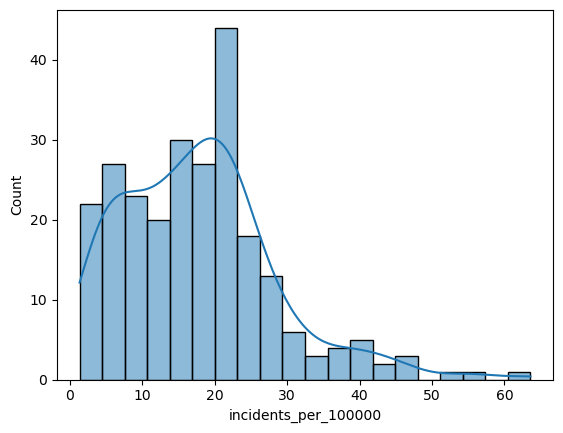

In [40]:
sns.histplot(df_agg['incidents_per_100000'], bins=20, kde = True) # shows extreme values for incidents_per_100000

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_killed_per_100000', ylabel='Count'>

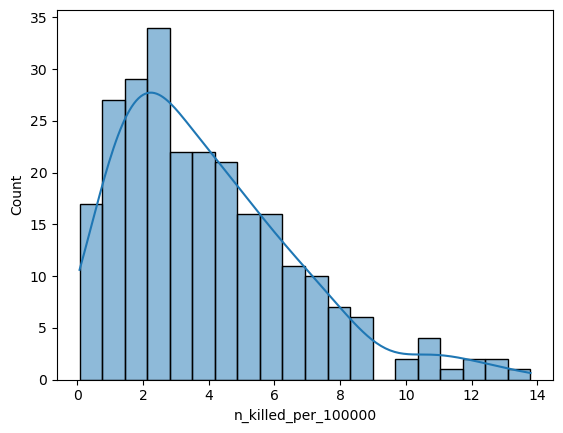

In [41]:
sns.histplot(df_agg['n_killed_per_100000'], bins=20, kde = True) # shows extreme values for n_killed_per_100000

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_injured_per_100000', ylabel='Count'>

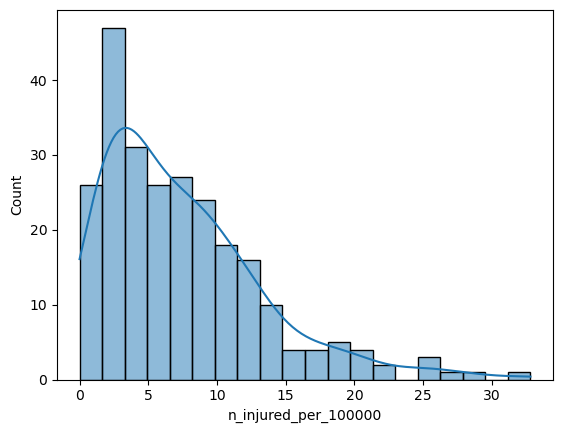

In [42]:
sns.histplot(df_agg['n_injured_per_100000'], bins=20, kde = True) # shows extreme values for n_injured_per_100000

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_guns_involved_per_100000', ylabel='Count'>

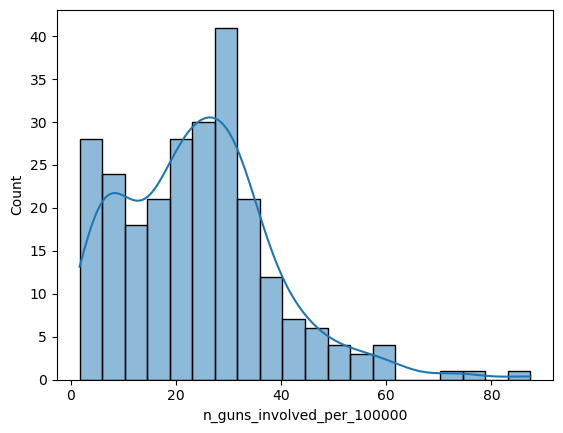

In [45]:
sns.histplot(df_agg['n_guns_involved_per_100000'], bins=20, kde = True) # shows extreme values for n_guns_involved_per_100000

#### Everything reasonable.

#### 7: Create a choropleth map using a variable of your choice.

#### We're creating one map for each variable. 

#### incidents_per_100000

In [48]:
data_to_plot_incident = df_agg[['State','incidents_per_100000']]
data_to_plot_incident.head()

,State,incidents_per_100000
state_year,,
Alabama2014,Alabama,29.254479
Alabama2015,Alabama,23.568069
Alabama2016,Alabama,28.826523
Alabama2017,Alabama,31.815724
Alabama2018,Alabama,7.653904


In [49]:
# choropleth map for incidents_per_100000

# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_incident,
    columns = ['State', 'incidents_per_100000'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "incidents_per_100000").add_to(map)
folium.LayerControl().add_to(map)

map

#### n_killed_per_100000

In [50]:
data_to_plot_n_killed = df_agg[['State','n_killed_per_100000']]
data_to_plot_n_killed.head()

,State,n_killed_per_100000
state_year,,
Alabama2014,Alabama,7.213737
Alabama2015,Alabama,8.775345
Alabama2016,Alabama,10.746633
Alabama2017,Alabama,11.846512
Alabama2018,Alabama,2.977744


In [53]:
# n_killed_per_100000

# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_n_killed,
    columns = ['State', 'n_killed_per_100000'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "n_killed_per_100000").add_to(map)
folium.LayerControl().add_to(map)

map

#### n_injured_per_100000

In [54]:
data_to_plot_n_injured = df_agg[['State','n_injured_per_100000']]
data_to_plot_n_injured.head()

,State,n_injured_per_100000
state_year,,
Alabama2014,Alabama,13.117904
Alabama2015,Alabama,12.809724
Alabama2016,Alabama,16.758582
Alabama2017,Alabama,18.640835
Alabama2018,Alabama,4.830562


In [55]:
# n_injured_per_100000

# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_n_injured,
    columns = ['State', 'n_injured_per_100000'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "n_injured_per_100000").add_to(map)
folium.LayerControl().add_to(map)

map

#### n_guns_involved_per_100000

In [56]:
data_to_plot_n_guns = df_agg[['State','n_guns_involved_per_100000']]
data_to_plot_n_guns.head()

,State,n_guns_involved_per_100000
state_year,,
Alabama2014,Alabama,39.777063
Alabama2015,Alabama,33.834815
Alabama2016,Alabama,40.512577
Alabama2017,Alabama,40.986260
Alabama2018,Alabama,8.668543


In [57]:
# n_guns_involved_per_100000

# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_n_guns,
    columns = ['State', 'n_guns_involved_per_100000'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "n_guns_involved_per_100000").add_to(map)
folium.LayerControl().add_to(map)

map

#### 8: Discuss the results and what they mean in a markdown section.
- Does the analysis answer any of your existing research questions?
- Does the analysis lead you to any new research questions?

#### Does the analysis answer any of your existing research questions?


#### In our research questions we adressed the number of incidents/killed/injured overall - in this case we used per 100000. So the maps don't answer it directly. Indirectly the variables per 100000 are more presice in the classification of the size ratios, So it is possible to use them and rephrase the questions slightly.

#### Does the analysis lead you to any new research questions?

#### Not really. The results help to get a feeling for the overall situation. After the darkest coloured states have been inspected for their gunlaws, further conclusions can be drawn.